# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

winning architecture: http://blog.kaggle.com/2015/01/02/cifar-10-competition-winners-interviews-with-dr-ben-graham-phil-culliton-zygmunt-zajac/

Took 90 hours to train on a GPU

In [2]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

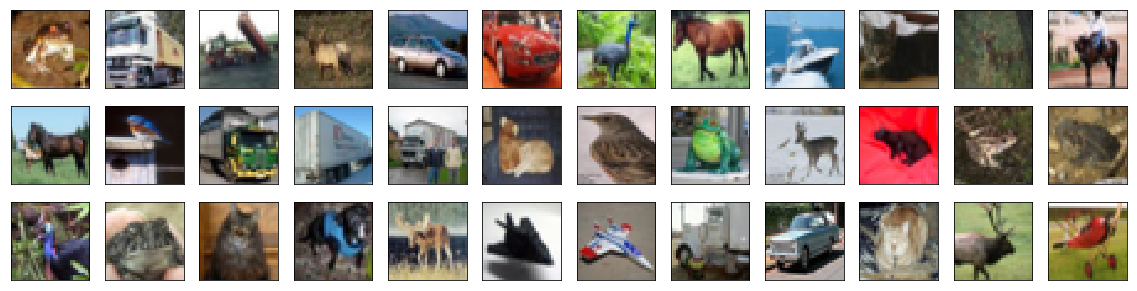

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary() # total params is 528k, compared to 3M in MLP

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [8]:
from keras.callbacks import ModelCheckpoint   
import time

# train the model
t0 = time.time()
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)
print('CNN training takes: ', time.time() - t0) 
#CNN: 2927.65 seconds, 29.3 seconds per epoch
#MLP: 1236.17 seconds, 61.8 seconds per epoch

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.39818, saving model to model.weights.best.hdf5
30s - loss: 1.6094 - acc: 0.4196 - val_loss: 1.3982 - val_acc: 0.4906
Epoch 2/100
Epoch 00001: val_loss improved from 1.39818 to 1.33721, saving model to model.weights.best.hdf5
30s - loss: 1.2665 - acc: 0.5502 - val_loss: 1.3372 - val_acc: 0.5306
Epoch 3/100
Epoch 00002: val_loss did not improve
31s - loss: 1.1458 - acc: 0.5948 - val_loss: 1.3776 - val_acc: 0.5464
Epoch 4/100
Epoch 00003: val_loss improved from 1.33721 to 1.00947, saving model to model.weights.best.hdf5
31s - loss: 1.0821 - acc: 0.6212 - val_loss: 1.0095 - val_acc: 0.6532
Epoch 5/100
Epoch 00004: val_loss improved from 1.00947 to 0.97828, saving model to model.weights.best.hdf5
29s - loss: 1.0404 - acc: 0.6383 - val_loss: 0.9783 - val_acc: 0.6672
Epoch 6/100
Epoch 00005: val_loss did not improve
29s - loss: 1.0153 - acc: 0.6513 - val_loss: 1.0077 - val_acc: 0.6700
Epo

Epoch 00065: val_loss did not improve
28s - loss: 1.7090 - acc: 0.4103 - val_loss: 1.6340 - val_acc: 0.4644
Epoch 67/100
Epoch 00066: val_loss did not improve
29s - loss: 1.7216 - acc: 0.4144 - val_loss: 1.4551 - val_acc: 0.4972
Epoch 68/100
Epoch 00067: val_loss did not improve
28s - loss: 1.7281 - acc: 0.4062 - val_loss: 1.6107 - val_acc: 0.4728
Epoch 69/100
Epoch 00068: val_loss did not improve
28s - loss: 1.7435 - acc: 0.4023 - val_loss: 1.5905 - val_acc: 0.4254
Epoch 70/100
Epoch 00069: val_loss did not improve
28s - loss: 1.7553 - acc: 0.3894 - val_loss: 1.5581 - val_acc: 0.4424
Epoch 71/100
Epoch 00070: val_loss did not improve
28s - loss: 1.7491 - acc: 0.3938 - val_loss: 1.8206 - val_acc: 0.4092
Epoch 72/100
Epoch 00071: val_loss did not improve
28s - loss: 1.7550 - acc: 0.3894 - val_loss: 1.4628 - val_acc: 0.4944
Epoch 73/100
Epoch 00072: val_loss did not improve
28s - loss: 1.7613 - acc: 0.3935 - val_loss: 1.6058 - val_acc: 0.4274
Epoch 74/100
Epoch 00073: val_loss did not im

### 8. Load the Model with the Best Validation Accuracy

In [9]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [13]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])
#note that the best score achieved is 95%


 Test accuracy: 0.6852


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [11]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

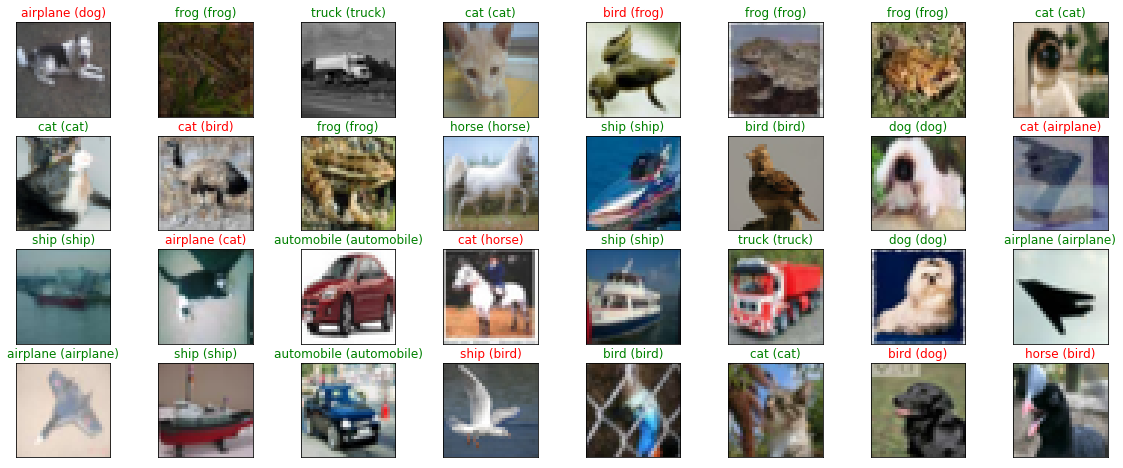

In [12]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [14]:
# new model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.summary() # total params is 65k, even less than default CNN of 528k, compared to 3M in MLP

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [15]:
batch_size = 32
epochs = 100

t0 = time.time()
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)
print('CNN training takes: ', time.time() - t0)
#Customized CNN: 16554.56 seconds, 165.5 seconds per epoch
#default CNN: 2927.65 seconds, 29.3 seconds per epoch
#MLP: 1236.17 seconds, 61.8 seconds per epoch

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.63979, saving model to model.weights.best.hdf5
168s - loss: 1.8466 - acc: 0.3212 - val_loss: 1.6398 - val_acc: 0.4150
Epoch 2/100
Epoch 00001: val_loss improved from 1.63979 to 1.38536, saving model to model.weights.best.hdf5
166s - loss: 1.5420 - acc: 0.4350 - val_loss: 1.3854 - val_acc: 0.5074
Epoch 3/100
Epoch 00002: val_loss improved from 1.38536 to 1.26147, saving model to model.weights.best.hdf5
165s - loss: 1.4033 - acc: 0.4945 - val_loss: 1.2615 - val_acc: 0.5508
Epoch 4/100
Epoch 00003: val_loss did not improve
168s - loss: 1.3087 - acc: 0.5289 - val_loss: 1.3801 - val_acc: 0.5164
Epoch 5/100
Epoch 00004: val_loss improved from 1.26147 to 1.25411, saving model to model.weights.best.hdf5
171s - loss: 1.2312 - acc: 0.5618 - val_loss: 1.2541 - val_acc: 0.5540
Epoch 6/100
Epoch 00005: val_loss improved from 1.25411 to 1.10501, saving model to model.weights.best.hdf5
171s - los

Epoch 00056: val_loss did not improve
164s - loss: 0.6321 - acc: 0.7892 - val_loss: 0.6670 - val_acc: 0.7824
Epoch 58/100
Epoch 00057: val_loss did not improve
163s - loss: 0.6250 - acc: 0.7900 - val_loss: 0.6462 - val_acc: 0.7870
Epoch 59/100
Epoch 00058: val_loss did not improve
162s - loss: 0.6317 - acc: 0.7888 - val_loss: 0.7143 - val_acc: 0.7902
Epoch 60/100
Epoch 00059: val_loss did not improve
165s - loss: 0.6272 - acc: 0.7878 - val_loss: 0.6588 - val_acc: 0.7788
Epoch 61/100
Epoch 00060: val_loss did not improve
166s - loss: 0.6246 - acc: 0.7894 - val_loss: 0.7457 - val_acc: 0.7678
Epoch 62/100
Epoch 00061: val_loss did not improve
165s - loss: 0.6263 - acc: 0.7896 - val_loss: 0.6547 - val_acc: 0.7840
Epoch 63/100
Epoch 00062: val_loss did not improve
164s - loss: 0.6238 - acc: 0.7920 - val_loss: 0.7538 - val_acc: 0.7608
Epoch 64/100
Epoch 00063: val_loss did not improve
166s - loss: 0.6204 - acc: 0.7927 - val_loss: 0.6656 - val_acc: 0.7856
Epoch 65/100
Epoch 00064: val_loss di

In [16]:
model.load_weights('model.weights.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])
#CNN customized effort: Test accuracy: 0.7869
#CNN default effort: Test accuracy: 0.6852
#note that the best score achieved is 95%


 Test accuracy: 0.7869
